In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler


# Predicting the PSX market closing price stock price of FFC 

In [2]:
df = pd.read_csv('PSX.csv')
print(df.columns)
df.index = pd.to_datetime(df.Date)
# df.set_index('Date', inplace=True)
del df['Date']

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [3]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [4]:
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2000-12-11,40.70,42.10,40.60,41.25,2604400.0
2000-12-12,41.25,41.75,40.50,40.50,1838200.0
2000-12-13,40.50,40.65,39.75,39.85,1726600.0
2000-12-14,39.85,40.00,39.60,39.60,675100.0
2000-12-16,39.60,41.25,39.90,40.90,2452900.0


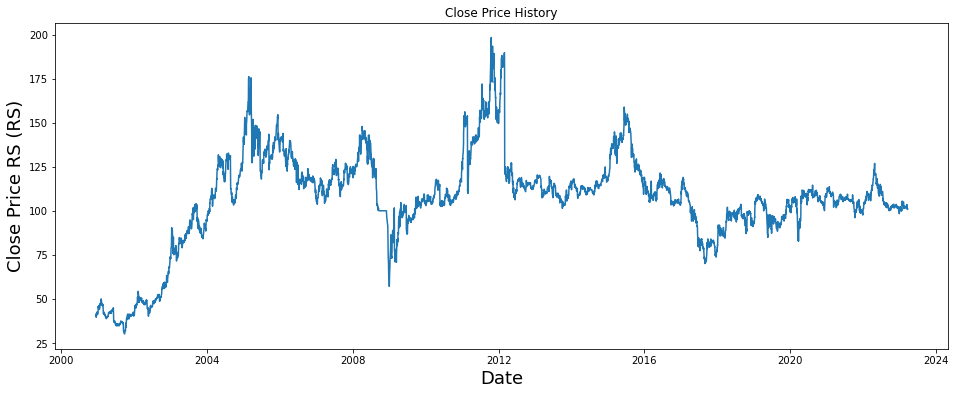

In [5]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price RS (RS)', fontsize=18)
plt.show()

# Normalize

In [6]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print("length training datase",training_data_len)

# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(len(scaled_data))
print(scaled_data)

length training datase 5195
5468
[[0.06627043]
 [0.06181278]
 [0.05794948]
 ...
 [0.42169391]
 [0.42430906]
 [0.42038633]]


In [7]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.06627043, 0.06181278, 0.05794948, 0.0564636 , 0.06419019,
       0.0692422 , 0.0653789 , 0.07132244, 0.07399703, 0.07013373,
       0.0653789 , 0.06894502, 0.07280832, 0.09212481, 0.08855869,
       0.09301634, 0.09153046, 0.09182764, 0.09628529, 0.09628529,
       0.08945022, 0.08261516, 0.08469539, 0.09093611, 0.0897474 ,
       0.09895988, 0.09925706, 0.10341753, 0.10104012, 0.09925706,
       0.09925706, 0.09806835, 0.10876672, 0.10757801, 0.11233284,
       0.11827637, 0.10579495, 0.1013373 , 0.09985141, 0.0986627 ,
       0.10163447, 0.09925706, 0.09955423, 0.09509658, 0.10014859,
       0.09955423, 0.09063893, 0.08826152, 0.08499257, 0.07429421,
       0.06686478, 0.07459138, 0.06983655, 0.06835067, 0.07072808,
       0.06775632, 0.06329866, 0.06478455, 0.06359584, 0.05943536])]
[0.057949479940564624]

[array([0.06627043, 0.06181278, 0.05794948, 0.0564636 , 0.06419019,
       0.0692422 , 0.0653789 , 0.07132244, 0.07399703, 0.07013373,
       0.0653789 , 0.06894502, 0.0

# LSTM Model

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

5135/5135 [==============================] - 363s 67ms/step - loss: 9.4417e-04


# Testing

In [9]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9/9 [==============================] - 7s 52ms/step


1.2077120828136934

C:\Users\msaad\AppData\Local\Temp\ipykernel_19144\960864983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


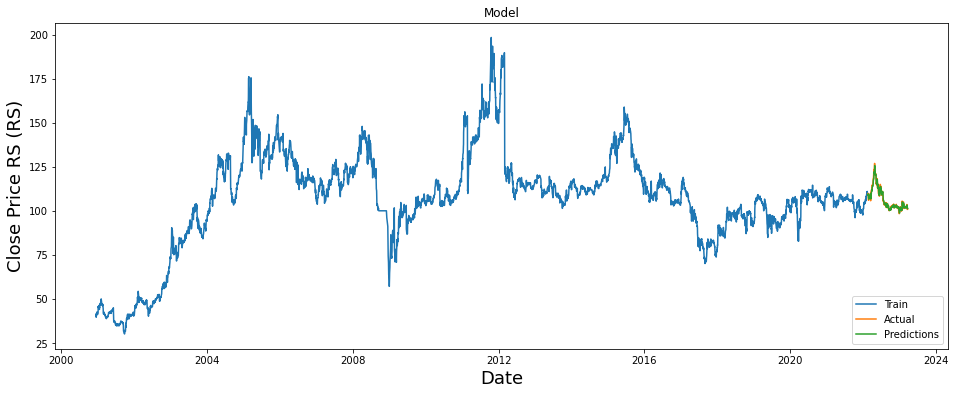

In [10]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price RS (RS)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
model.save("PSX_Model.h5")